In [1]:
import numpy as np
import matplotlib.pyplot as plt

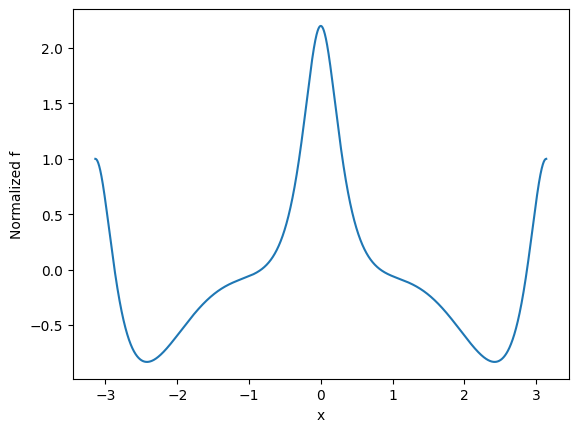

In [58]:
# a1s = np.sort(np.random.rand(5)) * np.exp(1j*(2*np.pi*np.random.rand(5)))
xs = np.linspace(-np.pi,np.pi,10000)
Q = 0.5 + 0j
R = 0+ 0j
a1s = np.array([Q**n for n in range(1,200)])
eps = 0.3
a1s[0] = eps
b1s = np.array([R**(2*n-1) for n in range(1,200)])
b1s[0] = eps

f = 0*xs
for i,n in enumerate(np.arange(1,len(a1s)+1)):
    f+= (a1s[i]*np.exp((2*n)*1j*xs) + a1s[i].conj()*np.exp((-2*n)*1j*xs)).real
    # if n ==1:
    f+= (b1s[i]*np.exp((2*n-1)*1j*xs) + b1s[i].conj()*np.exp((-2*n+1)*1j*xs)).real
# Normalize f so that the sum is 1
f = f / np.sum(f)

# Plot the normalized f
plt.plot(xs, f)
plt.xlabel('x')
plt.ylabel('Normalized f')
# plt.title('Normalized f over the range -π to π')
plt.show()

# simulation with perturbation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from Simul import get_m1_m2,get_RQ_MOA,get_R_simul,get_RQ_MOA2,get_R_simul_wf,get_R_simul_wf2,RK4_ZZ2,Kuramoto_MF_CHIMERA,gen_dist2,get_R_sim_pert
from Simul import dZ2_dt,RK4,to_complex,dZ_dt,get_R_simul_wfT,RK4_ZZ,get_RQ_MOA3
from parfor import parfor

from tqdm.notebook import tqdm
from parfor import parfor

In [2]:
alpha = np.pi/4
beta = 0.5
eta1 = 0.1
eta2 = 0.01
shift = 0
N = 1000

In [3]:
t_end = 2000
Q_init2 = 0.6
eps = 0.
Q_init = Q_init2 - eps
# R1,R2,Q1,Q2,t = get_RQ_MOA(1,0.6,alpha=alpha,beta=beta,eta1=eta1,eta2=eta2,shift=shift,t_end=t_end)
R1,R2,Q1,Q2,_ = get_RQ_MOA2(1,abs(Q_init),alpha=alpha,beta=beta,eta1=eta1,eta2=eta2,shift=shift,t_end=t_end)
R1,R2,Q1,Q2_ori,_ = get_RQ_MOA2(1,Q_init2,alpha=alpha,beta=beta,eta1=eta1,eta2=eta2,shift=shift,t_end=t_end)

In [5]:
t_end = 2000
Q_init2 = 0.6
eps = 0.0
Q_init = Q_init2 - eps
R1,R2,Q1,Q2,t = get_RQ_MOA3(1,abs(Q_init),alpha=alpha,beta=beta,eta1=eta1,eta2=eta2,shift=shift,t_end=t_end)

In [6]:
Q_init

0.6

In [7]:

R1_s_reg,R2_s_reg,Q1_s_reg,Q2_s_reg,t,thetas_reg = get_R_simul_wfT(1.,Q_init,N,alpha=alpha,beta=beta,eta1=eta1,eta2=eta2,shift=shift,t_end=t_end,seed=None)

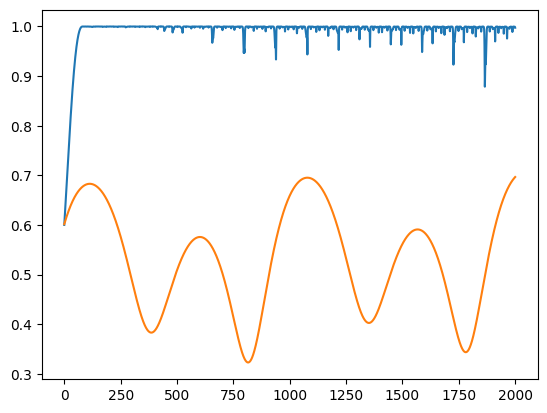

In [8]:
plt.plot(t,Q2)
plt.plot(t,Q2_s_reg)


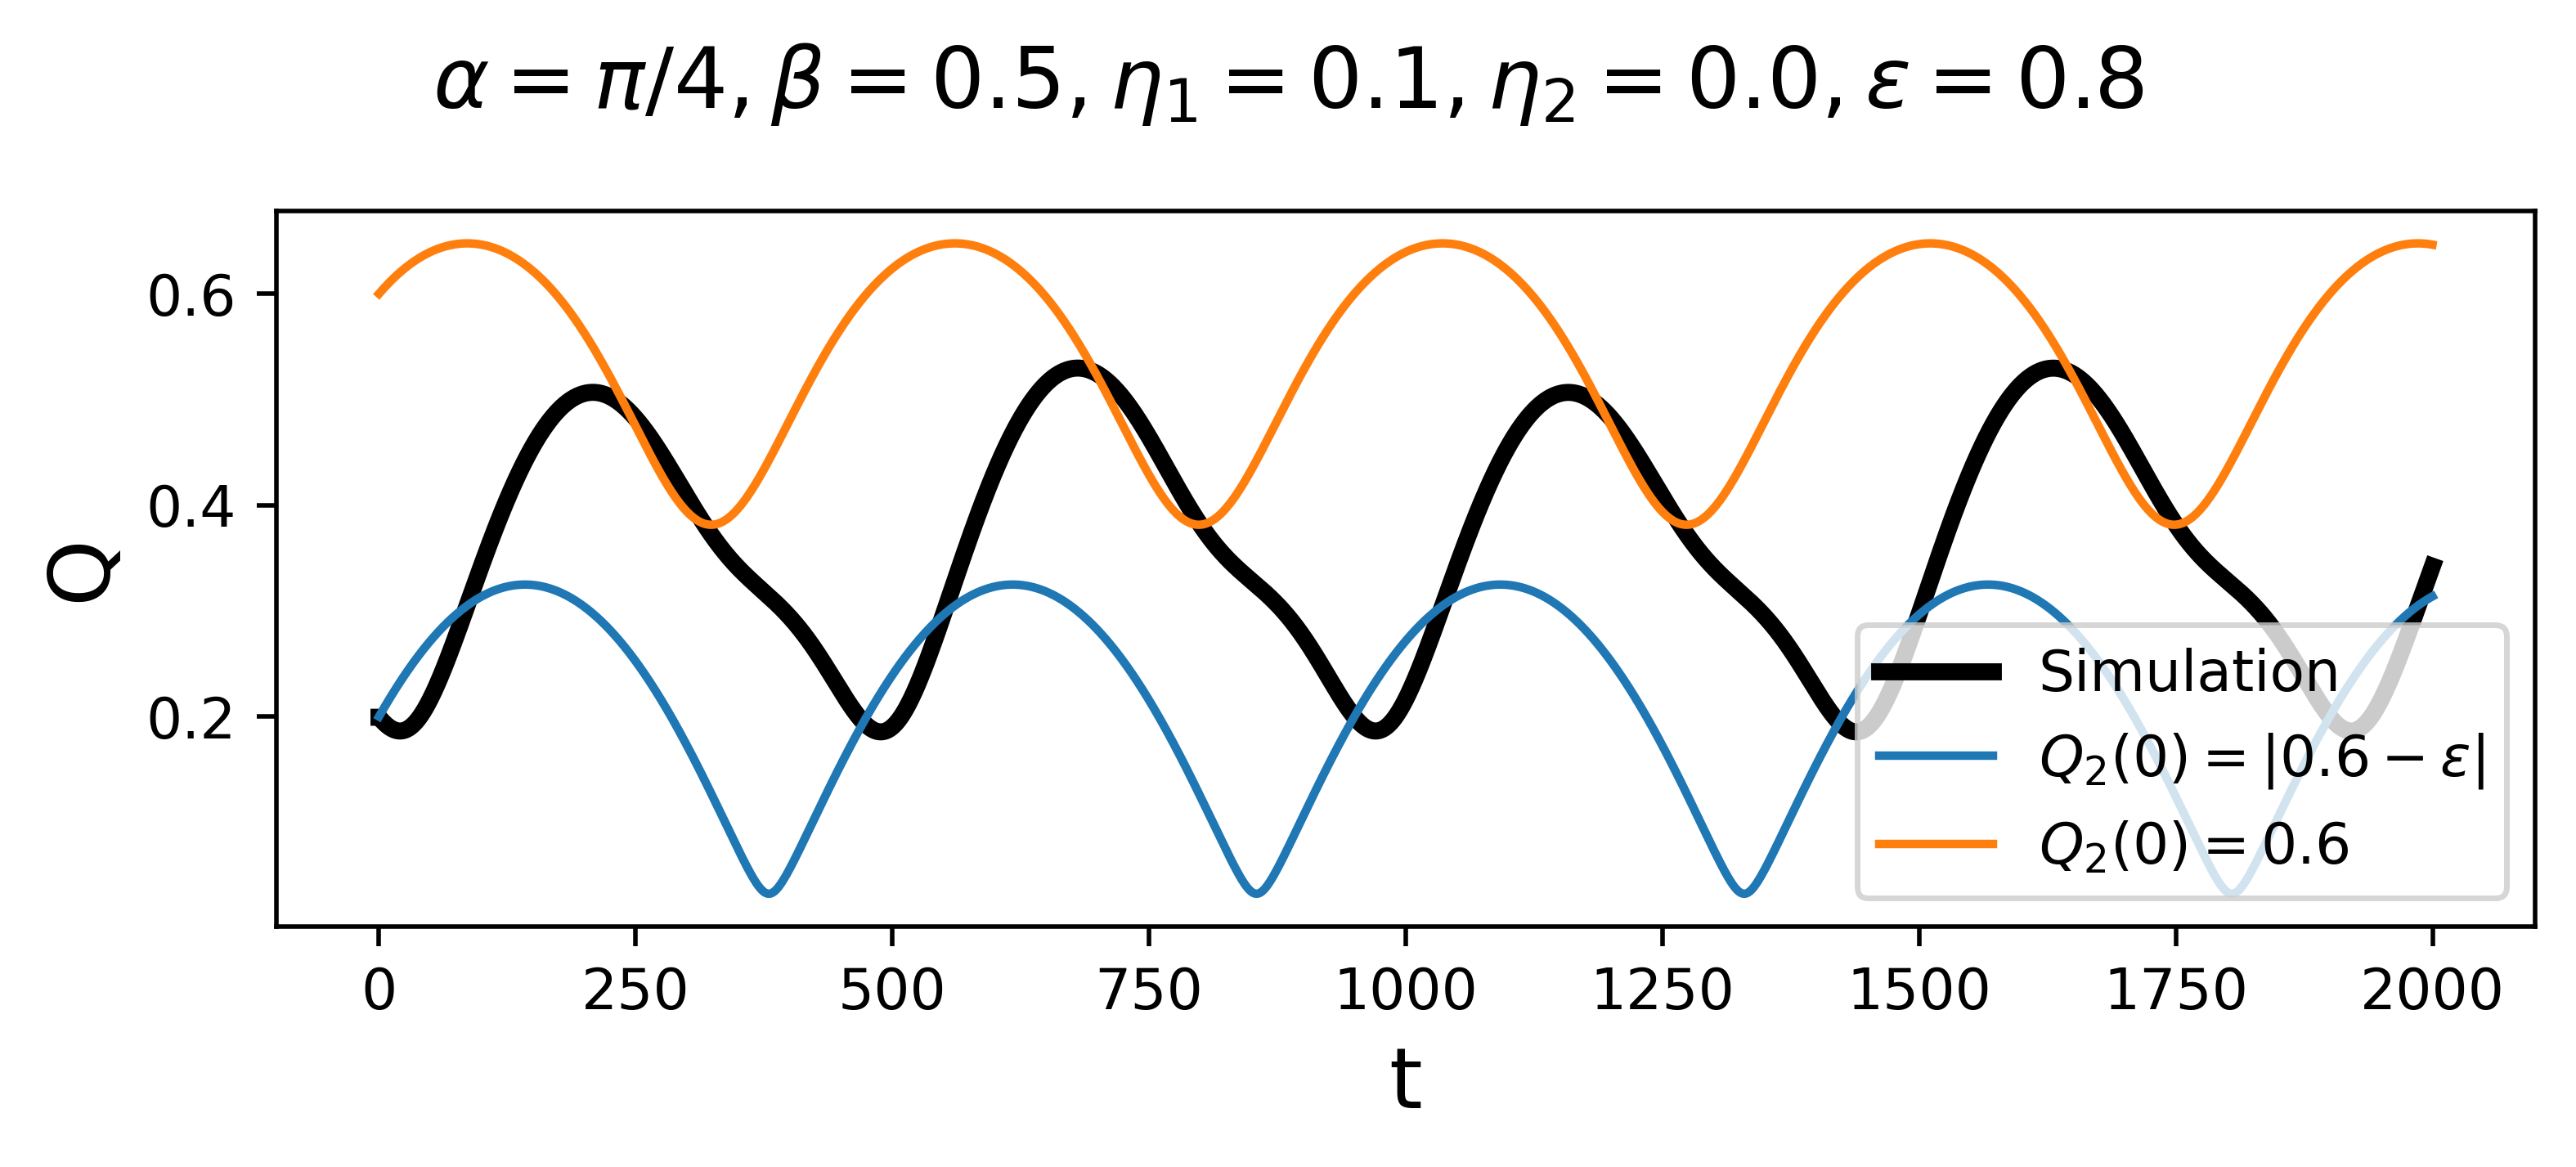

In [73]:
plt.figure(dpi=500)

plt.subplot(211)
# plt.plot(t,Q2_s,label='Simulation',color='black',lw=3,zorder=0)
plt.plot(t,Q2_s_reg,label='Simulation',color='black',lw=3,zorder=0)
# plt.plot(t,Q2,label=r'OA ansatz $n=1$')
plt.plot(t,Q2,label=rf'$Q_2(0)=|{Q_init2} - \epsilon|$')
plt.plot(t,Q2_ori,label=rf'$Q_2(0)={Q_init2}$')

# plt.plot(t,(Q2s + Q2s2)/2,label='modified OA ansatz 1')
# plt.plot(t,,label='modified OA ansatz 2')
plt.legend()
plt.ylabel('Q',fontsize=15)
plt.xlabel('t',fontsize=15)
# for a in nums:
    # plt.plot(t_,Q2_S[a])
plt.suptitle(rf'$\alpha=\pi/4,\beta={beta},\eta_1 = {eta1},\eta_2 = {eta2},\epsilon ={eps}$',fontsize=15)
# plt.xlim(0,3000)
# plt.ylim(0.0,1.05)
plt.tight_layout()

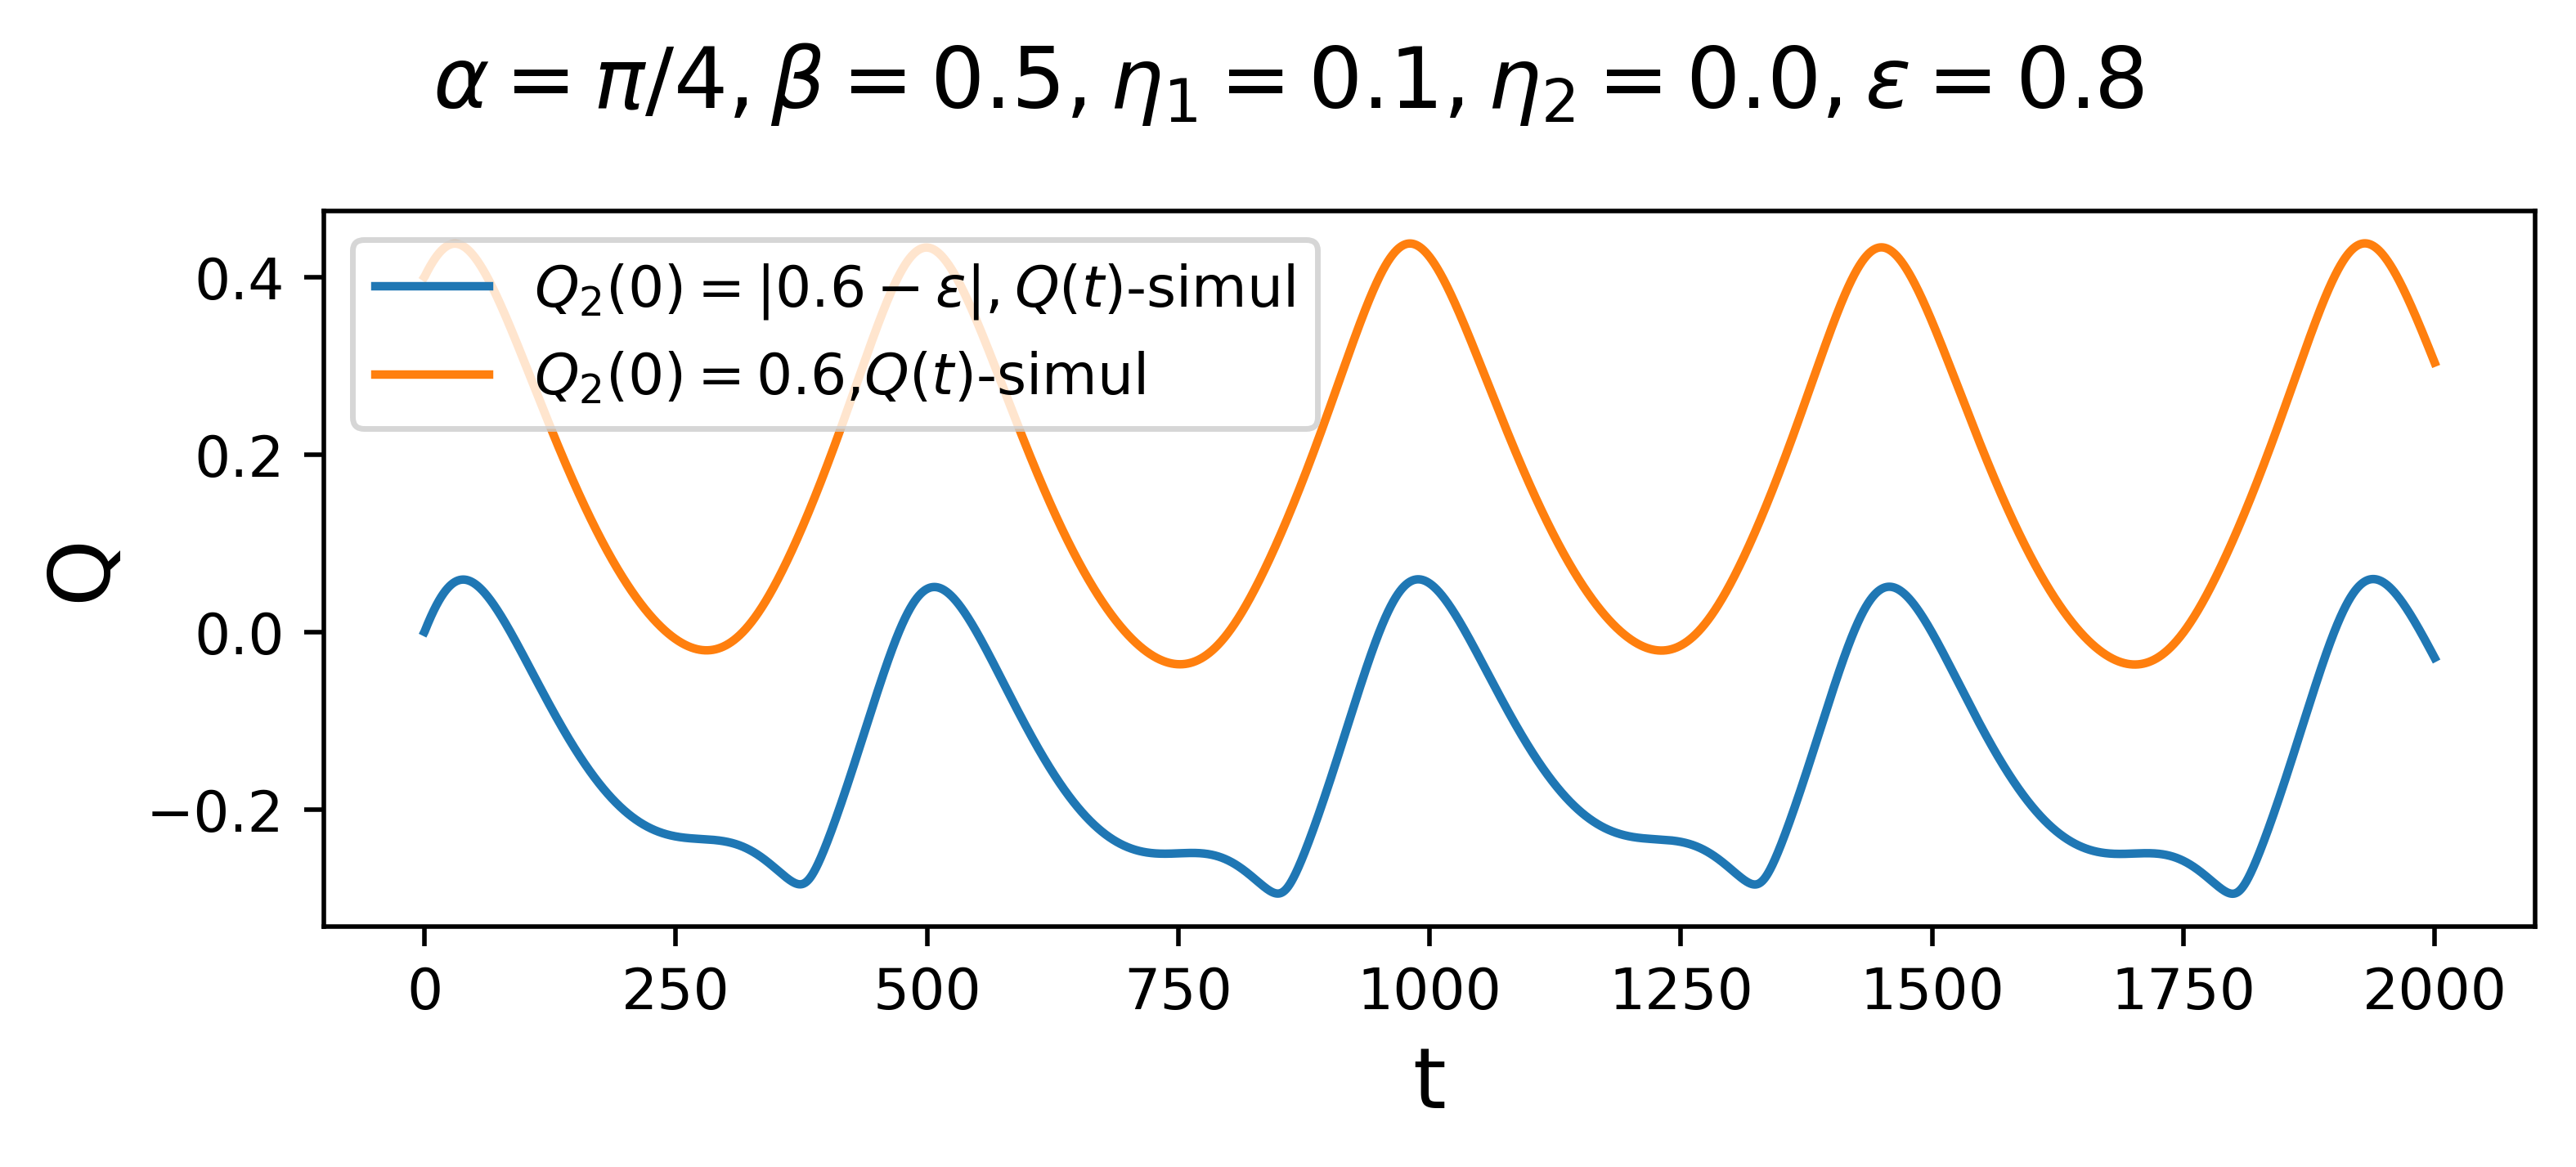

In [74]:
plt.figure(dpi=500)

plt.subplot(211)
plt.plot(t,Q2-Q2_s_reg,label=rf'$Q_2(0)=|{Q_init2} - \epsilon|,Q(t)$-simul')
plt.plot(t,Q2_ori-Q2_s_reg,label=rf'$Q_2(0)={Q_init2}$,$Q(t)$-simul')
plt.legend()
plt.ylabel('Q',fontsize=15)
plt.xlabel('t',fontsize=15)
# for a in nums:
    # plt.plot(t_,Q2_S[a])
plt.suptitle(rf'$\alpha=\pi/4,\beta={beta},\eta_1 = {eta1},\eta_2 = {eta2},\epsilon ={eps}$',fontsize=15)
# plt.xlim(0,3000)
# plt.ylim(0.0,1.05)
plt.tight_layout()

In [75]:

def f_c_a(xs,c,a):
    a_n = a*np.exp(1j*xs)
    a_d = a**2*np.exp(2j*xs)

    return 1/(2*np.pi) * (1-c**2) / (1-2*c*np.cos(2*xs) + c**2) + 1/(2*np.pi) * (a_n/(1-a_d))

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/matplotlib/cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


(0.0, 0.7783977082375766)

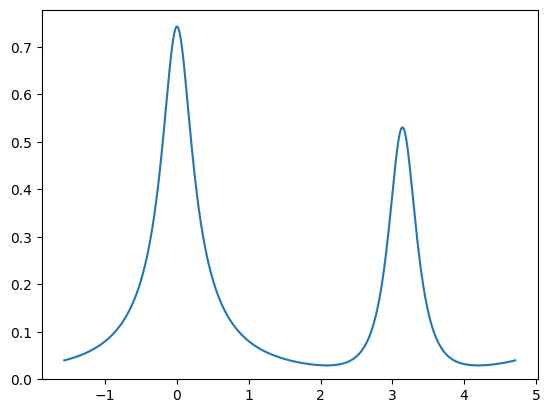

In [88]:
xs = np.linspace(-np.pi/2, 3*np.pi/2, 100000)
y = f_c_a(xs,0.6,0.5)
plt.plot(xs,y)
plt.ylim(0,)
